In [15]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [16]:
model = keras.models.load_model('handwritten_digit_model.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


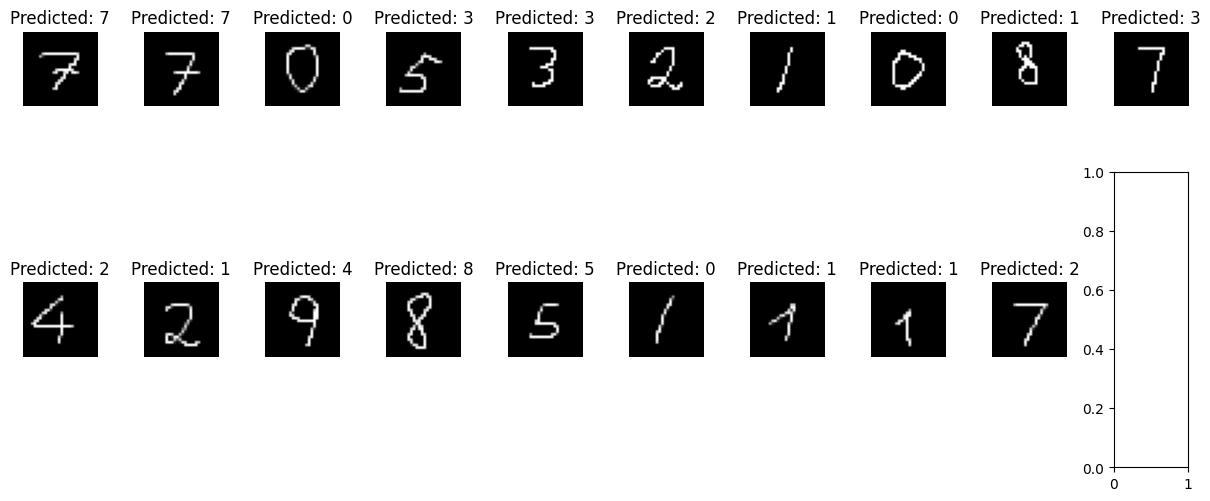

In [17]:

custom_images = []
predicted_digits = []
folder_path = os.path.join(os.path.expanduser('~'), 'Downloads', 'digits')  # Path to 'digits' folder in Downloads
for filename in os.listdir(folder_path):
    if filename.endswith('.png') or filename.endswith('.jpg'):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)[:,:,0]
        img =np.invert(np.array([img]))
        
        custom_images.append(img)

        
        prediction = model.predict(img)
        predicted_digit = np.argmax(prediction)
        predicted_digits.append(predicted_digit)

custom_images = np.array(custom_images)
predicted_digits = np.array(predicted_digits)

# Display results
fig, axs = plt.subplots(2, len(custom_images) // 2 + len(custom_images) % 2, figsize=(12, 6))
axs = axs.flatten()
for i in range(len(custom_images)):
    axs[i].imshow(custom_images[i].reshape(28, 28), cmap='gray')
    axs[i].set_title(f'Predicted: {predicted_digits[i]}')
    axs[i].axis('off')

plt.tight_layout()
plt.show()
